# Problem statement.

* This dataset comprises used cars sold in India as well as important features of these cars.
* Here, user can predict the price of the car based on input features.
* Prediction results can be used to give new seller the price suggestion based on market condition.

- importing necessary libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from six.moves import urllib

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

- Data Collection

In [27]:
download_dir ="./data/"

download_url = "https://raw.githubusercontent.com/mohitmahiyt/CarPricePredictionDataset/main/cars_dataset.csv"

os.makedirs(download_dir, exist_ok=True)
file_name = os.path.basename(download_url)
print(file_name)

download_file = os.path.join(download_dir, file_name)
print(download_file)

urllib.request.urlretrieve(download_url, download_file)

cars_dataset.csv
./data/cars_dataset.csv


('./data/cars_dataset.csv', <http.client.HTTPMessage at 0x1699de550>)

- Data read from local machine

In [28]:
df = pd.read_csv(download_file)
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,30016,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,30017,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,30018,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,30019,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [29]:
df["Unnamed: 0"] = range(1,len(df)+1)
df.rename(columns={'Unnamed: 0': "car_id"}, inplace= True)

In [30]:
# Load the dataset
data = df.copy()

# Separate the dataset into three tables
car_info = data[["car_id",'car_name', 'brand', 'model', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats']]
car_usage = data[['car_id', 'vehicle_age', 'km_driven', 'seller_type']]
car_selling_price = data[['car_id', 'selling_price']]

# Save each table to separate CSV files
car_info.to_csv('car_info.csv', index=False)
car_usage.to_csv('car_usage.csv', index=False)
car_selling_price.to_csv('car_selling_price.csv', index=False)

In [31]:
df =df.drop("car_id", axis=1)
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [32]:
# top 5 datasets
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000


In [33]:
df.sample()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3335,Maruti Swift Dzire,Maruti,Swift Dzire,9,60000,Dealer,Diesel,Manual,19.3,1248,73.9,5,370000


In [34]:
# bottom 5 datasets
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.6,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.2,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.0,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000
15410,Bentley Continental,Bentley,Continental,9,9000,Dealer,Petrol,Automatic,9.5,5998,626.0,4,14500000


In [35]:
df.shape 

(15411, 13)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [37]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [38]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [39]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [40]:
df.describe(include='object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [41]:
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

# EDA => Exploratory Data Analysis

In [42]:
df["car_name"].dtype

dtype('O')

In [43]:
df["max_power"].dtype

dtype('float64')

In [44]:
df["car_name"].dtype == 'O'

True

In [45]:
df["car_name"].dtype != 'O'

False

In [46]:
# filtering the numerical and categorical data using list comprehension

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Feature Information
* **car_name:** Car's Full name, which includes brand and specific model name.
* **brand:** Brand Name of the particular car.
* **model:** Exact model name of the car of a particular brand.
* **seller_type:** Which Type of seller is selling the used car
* **fuel_type:** Fuel used in the used car, which was put up on sale.
* **transmission_type:** Transmission used in the used car, which was put on sale.
* **vehicle_age:** The count of years since car was bought.
* **mileage:** It is the number of kilometer the car runs per litre.
* **engine:** It is the engine capacity in cc(cubic centimeters)
* **max_power:** Max power it produces in BHP.
* **seats:** Total number of seats in car.
* **selling_price:** The sale price which was put up on website.

In [47]:
print("Missing value present in different columns of DataFrame are as follows: ")
print('-'*100)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().sum().count()*100).sort_values(ascending=False)
pd.DataFrame({"Total":total, "Percentage":percent})

Missing value present in different columns of DataFrame are as follows: 
----------------------------------------------------------------------------------------------------


,Total,Percentage
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


In [48]:
# propotion of each unique value in categorical variable

for col in categorical_features:
    print((df[col].value_counts(normalize=True)*100).to_string())
    print()
    print("-----------------------------------------------------")
    print()

car_name
Hyundai i20               5.878918
Maruti Swift Dzire        5.775096
Maruti Swift              5.067809
Maruti Alto               5.048342
Honda City                4.912076
Maruti Wagon R            4.652521
Hyundai Grand             3.763546
Toyota Innova             3.536435
Hyundai Verna             3.192525
Hyundai i10               2.660437
Ford Ecosport             2.426838
Volkswagen Polo           2.420349
Maruti Baleno             2.361949
Honda Amaze               2.348972
Maruti Ciaz               2.245150
Maruti Ertiga             2.225683
Hyundai Creta             2.180261
Mahindra XUV500           2.141328
Renault KWID              1.985595
Maruti Vitara             1.914217
Mahindra Scorpio          1.771462
Ford Figo                 1.758484
Volkswagen Vento          1.602751
Maruti Celerio            1.537863
Renault Duster            1.414574
Mahindra Bolero           1.369152
Toyota Fortuner           1.213419
Skoda Rapid               1.180975
Honda Jazz 

# Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix "uni" means "one". The purpose of univariate analysis is to understand the distribution of values for a single variable.

**Note=> Explaination=> if you need to analyze the specific feature and not compare with any other features as such. then it is said to be Univariate analysis.**

# Numerical features

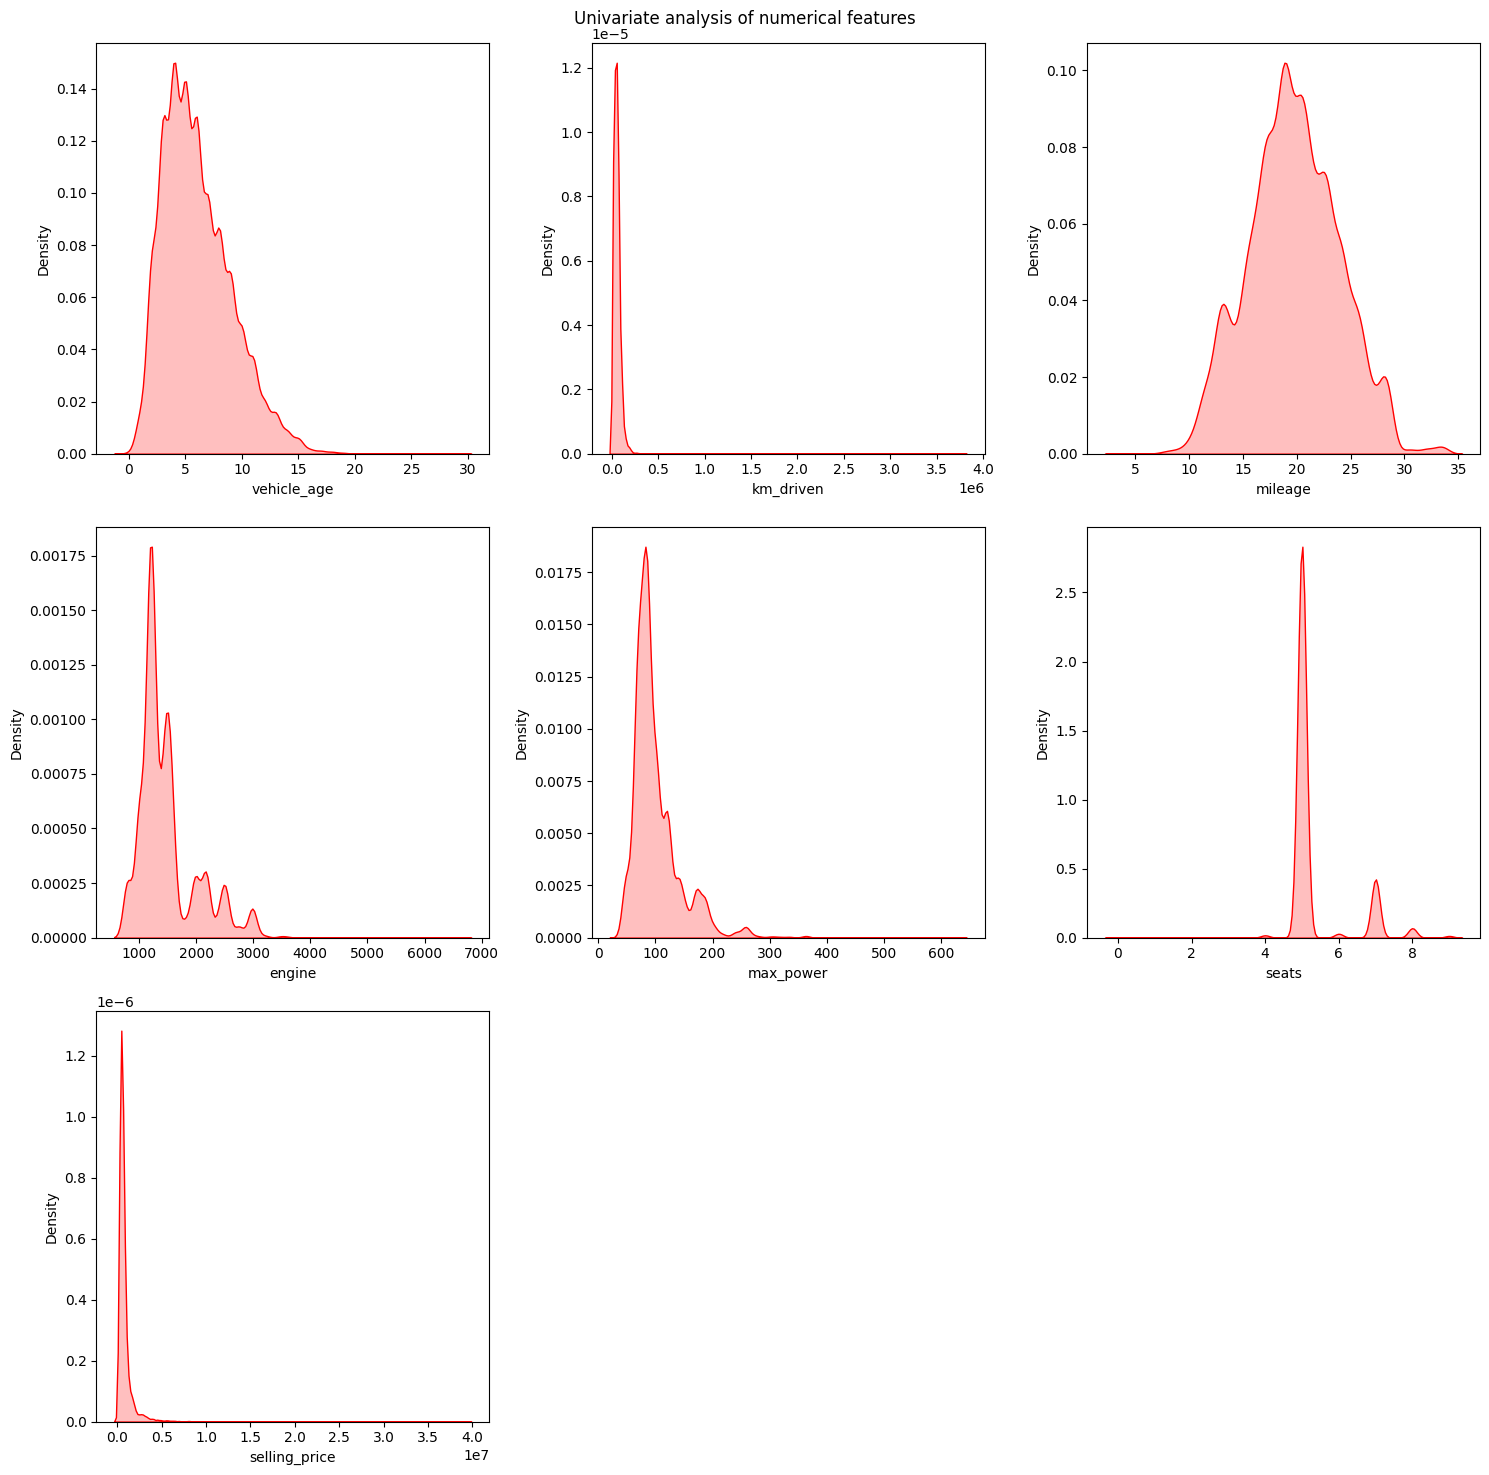

In [49]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of numerical features")

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x= df[numeric_features[i]], color='r', shade =True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    

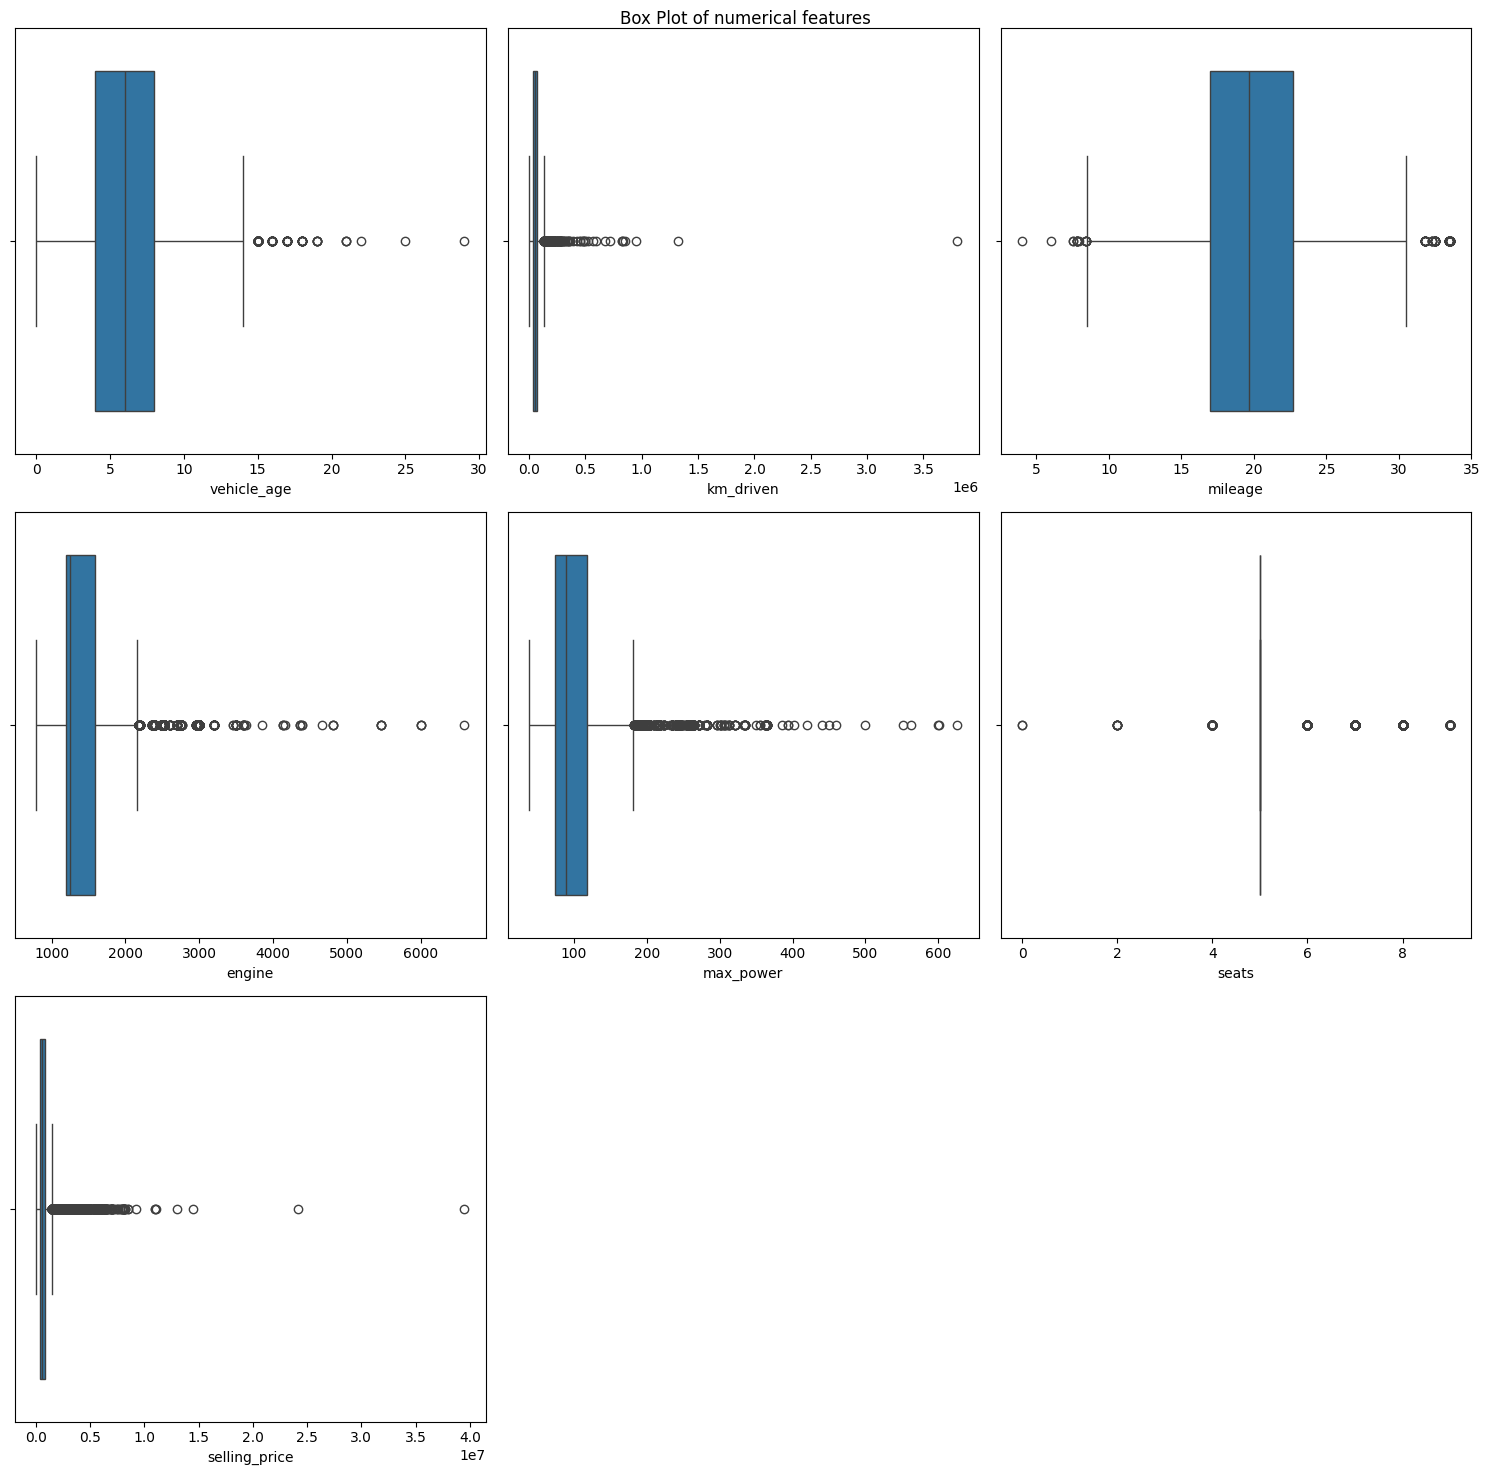

In [50]:
plt.figure(figsize=(15,15))

plt.suptitle("Box Plot of numerical features")

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x= df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# categorical features


In [51]:
df[categorical_features]

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
1,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
2,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
3,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
4,Maruti Alto,Maruti,Alto,Individual,CNG,Manual
...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,Dealer,Petrol,Automatic
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,Individual,Petrol,Automatic
15408,Bentley Continental,Bentley,Continental,Dealer,Petrol,Automatic
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,Dealer,Petrol,Automatic


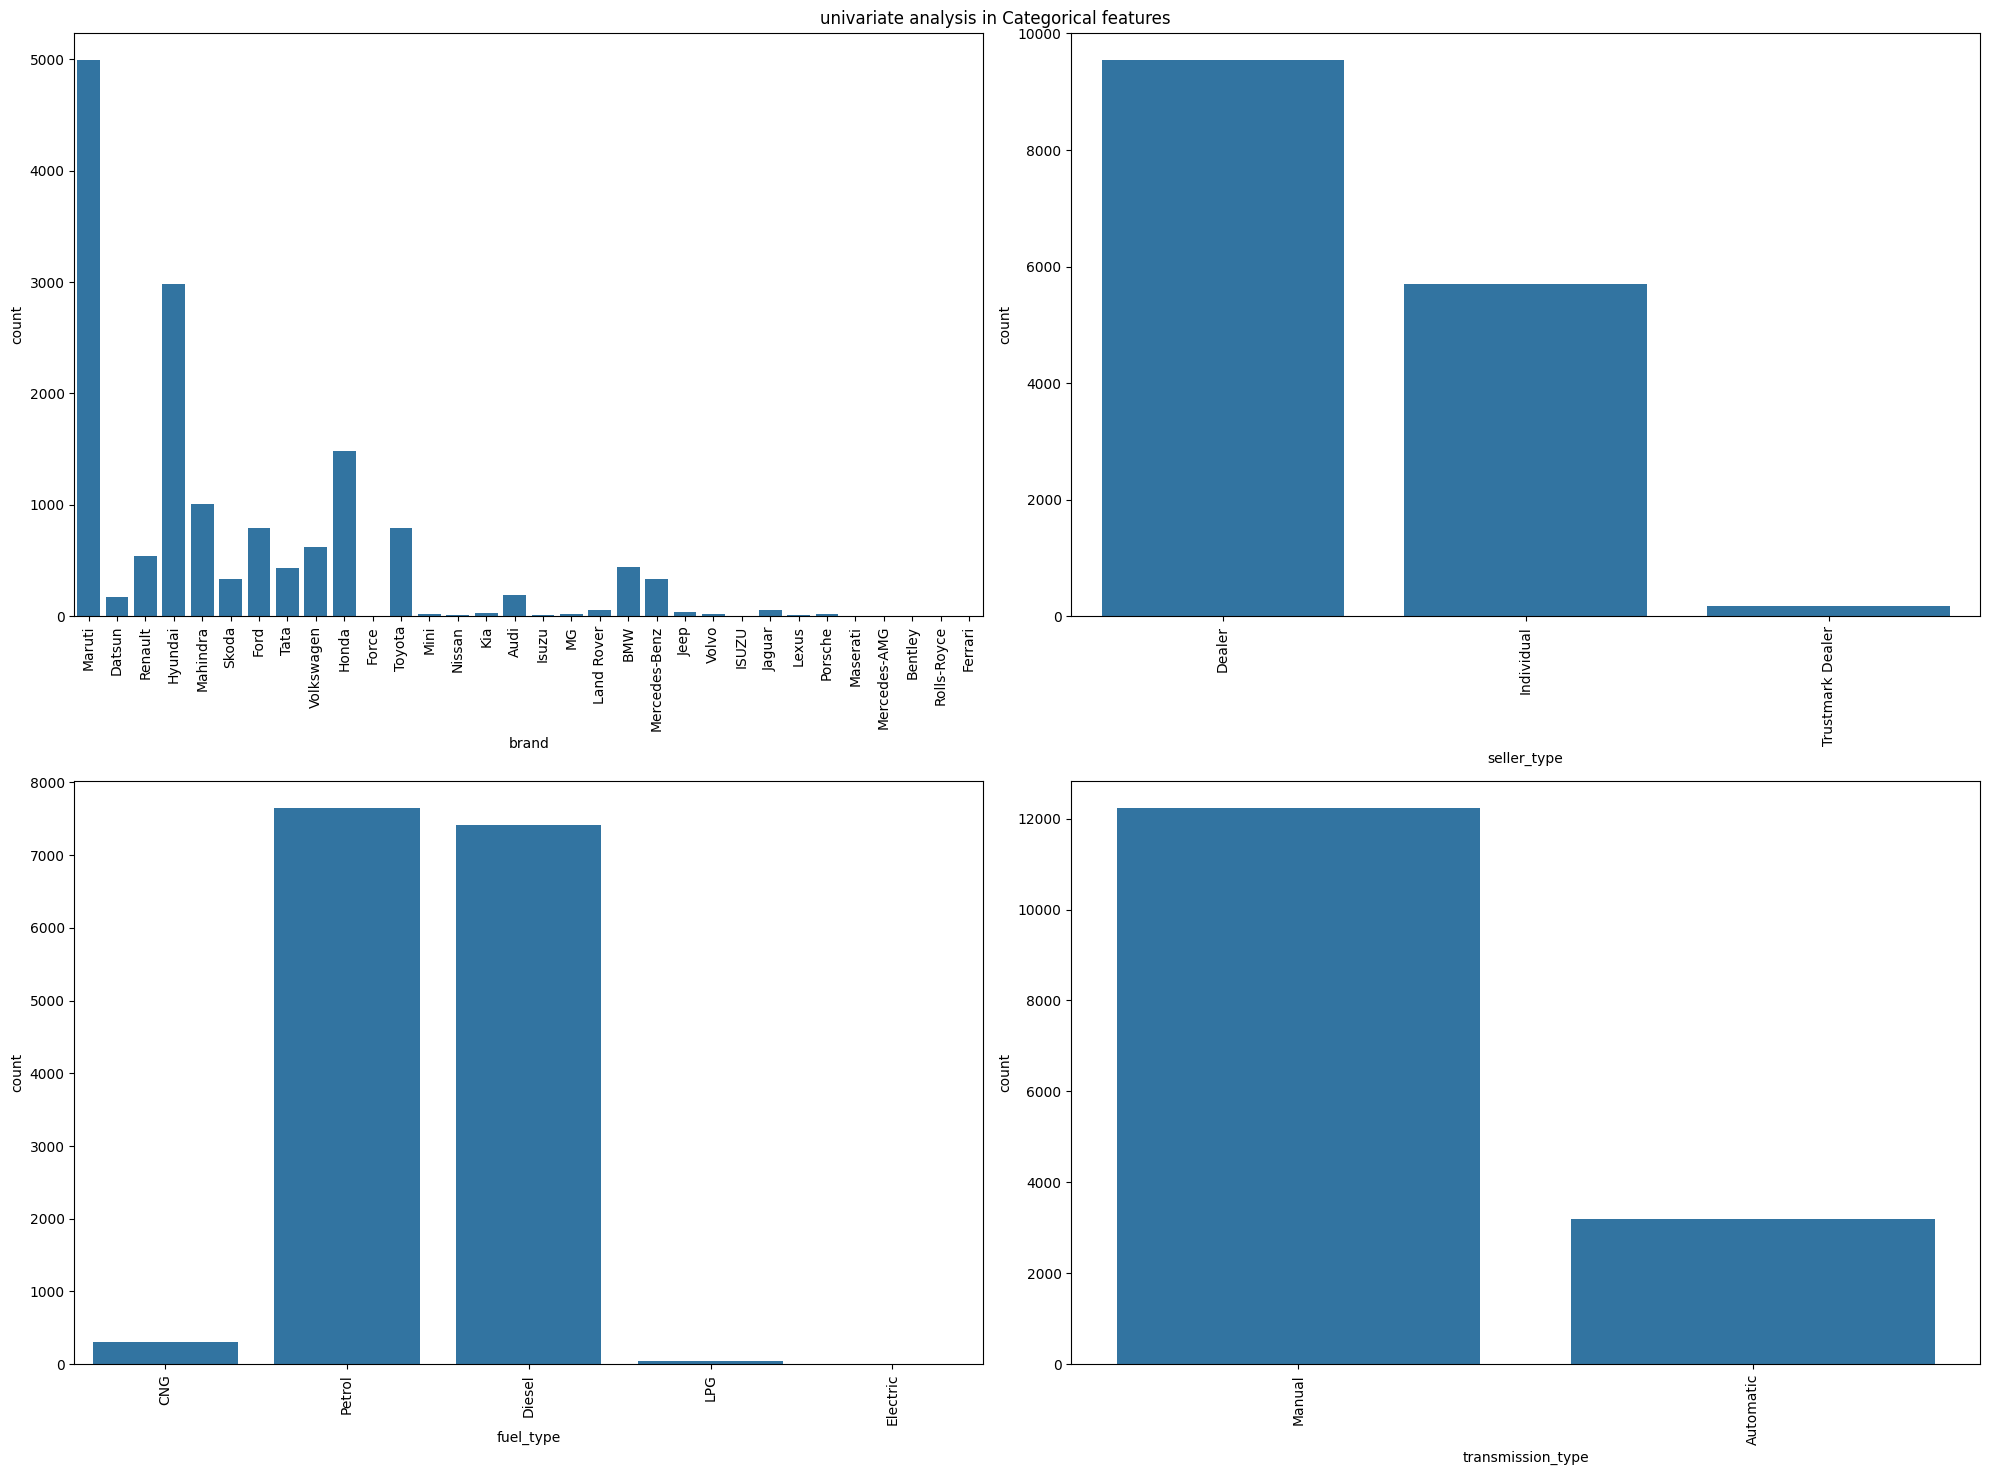

In [52]:
# categorical features
plt.figure(figsize= (20,15))
plt.suptitle("univariate analysis in Categorical features")
cat = ["brand", "seller_type", "fuel_type", "transmission_type"]
for i in range(len(cat)) :
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat[i]])
    plt.xticks(rotation=90)
    plt.xlabel(cat[i])
    plt.tight_layout()


# multi-variant analysis


In [53]:
df[numeric_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


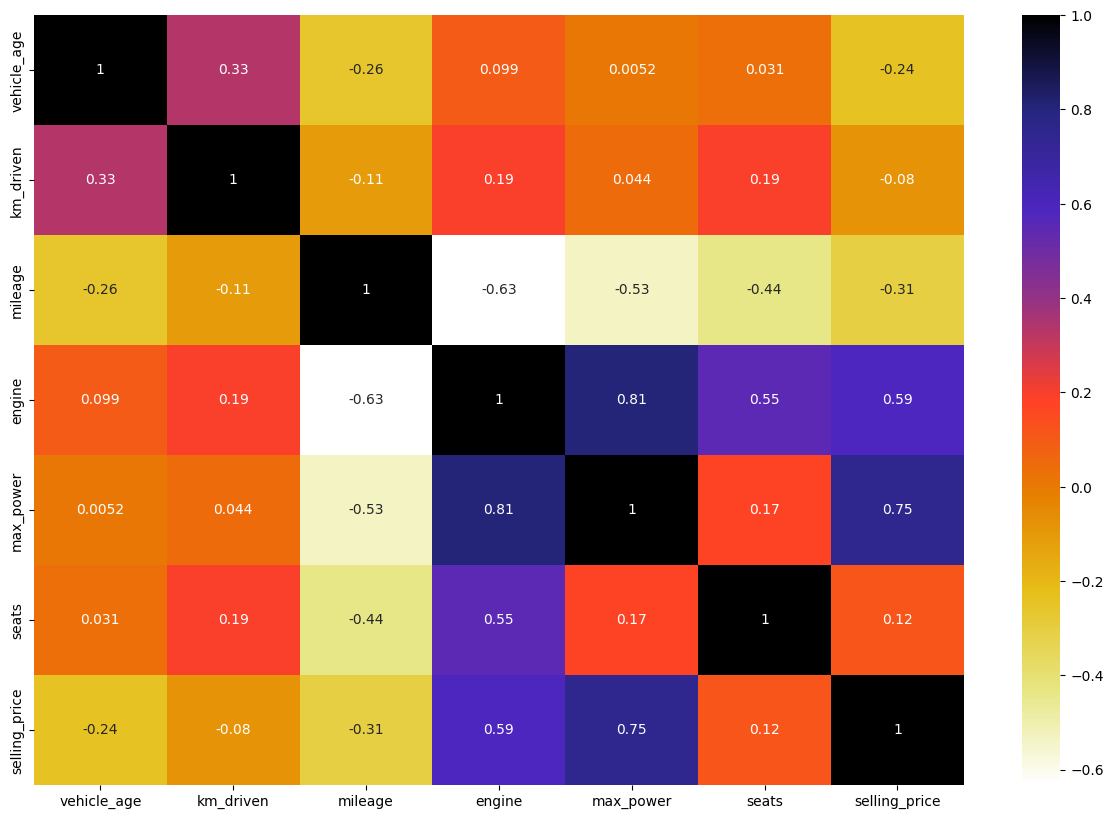

In [54]:
plt.figure(figsize = (15,10))
#sns.heatmap(df.corr(), cmap="CMRmap_r", annot=True)
sns.heatmap(df[numeric_features].corr(), cmap="CMRmap_r",annot=True)
plt.show()

In [55]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


# Checking the Outliers


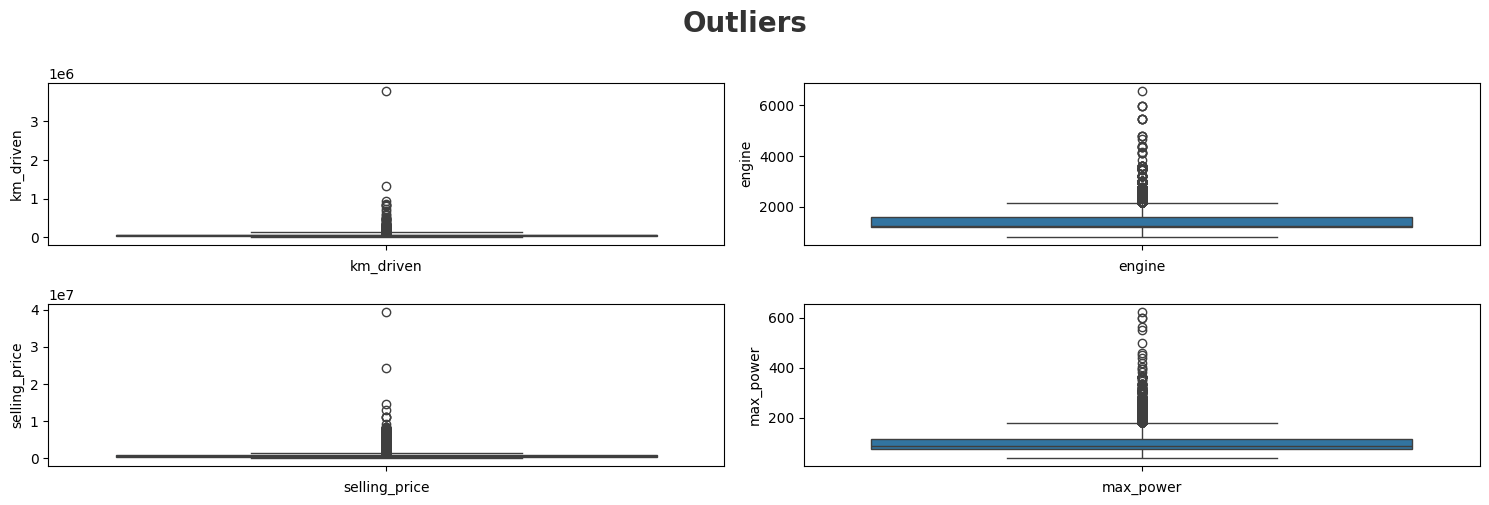

In [56]:
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    #plt.subplot(4,2,i+1)
    plt.subplot(2,2,i+1)
    sns.boxplot(df[outliers[i]])
    plt.xlabel(outliers[i])
    plt.tight_layout()

# Outlier detection and removal using IQR

In [152]:
   total_number_of_outliers_detected = []

   def outlier_detection_and_removal(df1, col_name):

     print("-------------------------------------------------------------------------------\n")
     print(col_name)
     print()
     print()
     Q1 = df1[col_name].quantile(0.25)
     Q3 = df1[col_name].quantile(0.75)

     print(f"Q1={Q1}, Q3={Q3}")

     IQR = Q3 - Q1
     print(f"IQR={IQR}")

     lower_limit = Q1 - 1.5*IQR
     upper_limit = Q3 + 1.5*IQR
     print(f"lower_limit= {lower_limit}, upper_limit = {upper_limit}")

     outlier_detected = df1[(df1[col_name]<lower_limit) | (df1[col_name]>upper_limit)]
     total_number_of_outliers_detected.append(len(outlier_detected))
     print(outlier_detected)

     df1 = df1[(df1[col_name]>=lower_limit) & (df1[col_name]<=upper_limit)]  #outliers removed from each column
     return df1
     print(df1)

   df1 = df.copy()
   for i in outliers:

     df1 = outlier_detection_and_removal(df1, i)
     print(df1)

   print(total_number_of_outliers_detected,": total outliers=>",sum(total_number_of_outliers_detected))



-------------------------------------------------------------------------------

km_driven


Q1=30000.0, Q3=70000.0
IQR=40000.0
lower_limit= -30000.0, upper_limit = 130000.0
                     car_name          brand     model  vehicle_age  \
141               Maruti Alto         Maruti      Alto           10   
391               Maruti Alto         Maruti      Alto            8   
482               Maruti Alto         Maruti      Alto            5   
504               Maruti Alto         Maruti      Alto            4   
792            Maruti Wagon R         Maruti   Wagon R            8   
...                       ...            ...       ...          ...   
15207  Mercedes-Benz GL-Class  Mercedes-Benz  GL-Class            9   
15305   Mercedes-Benz E-Class  Mercedes-Benz   E-Class            9   
15338   Mercedes-Benz S-Class  Mercedes-Benz   S-Class           11   
15372                 Audi Q7           Audi        Q7           11   
15375        Land Rover Rover     Land Rover 

In [58]:
df1

In [59]:
#df1.reset_index(inplace=True)

In [60]:
#df1.drop(columns=['index'], axis=1, inplace=True)

In [61]:
#df1.to_csv("cleaned_cars.csv", index=False)

In [62]:
# # Checking the Box plot after removing outliers
# plt.figure(figsize=(15,5))
# plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

# outliers= ['km_driven', 'engine', 'selling_price','max_power']
# # outliers= numeric_features
# for i in range(len(outliers)):
#     plt.subplot(2,2,i+1)
#     sns.boxplot(df1[outliers[i]], color='green')
#     plt.xlabel(outliers[i], color= 'r')
#     plt.tight_layout()

# insights from the data visualization

Selling price distribution

In [63]:
df['selling_price']

0          235000
1          185000
2          150000
3          172000
4          125000
           ...   
15406     8100000
15407    24200000
15408     5200000
15409    39500000
15410    14500000
Name: selling_price, Length: 15411, dtype: int64

(0.0, 3000000.0)

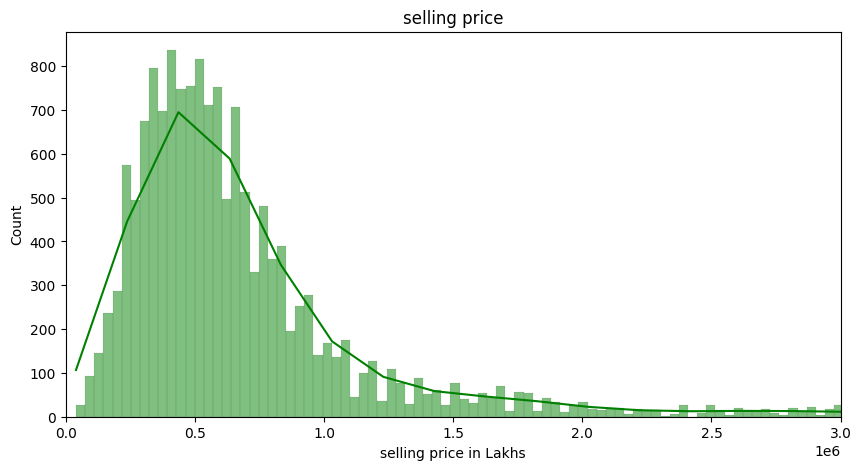

In [64]:
plt.figure(figsize=(10,5))
sns.histplot(df["selling_price"], kde=True,color='g')
plt.title("selling price")
plt.xlabel('selling price in Lakhs')
plt.xlim(0,3000000)

In [65]:
# most cars sold on dataset
df["car_name"].value_counts()

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Maserati Ghibli         1
Hyundai Aura            1
Force Gurkha            1
Isuzu MUX               1
Ferrari GTC4Lusso       1
Name: count, Length: 121, dtype: int64

In [66]:
# top 10 most cars sold on cars_dataset
df["car_name"].value_counts()[0:10]

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

- observation
- Hyndai i20 is most sold car

In [67]:
df["car_name"].value_counts().head(10)

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

In [68]:
df["car_name"].value_counts().index[0:10]

Index(['Hyundai i20', 'Maruti Swift Dzire', 'Maruti Swift', 'Maruti Alto',
       'Honda City', 'Maruti Wagon R', 'Hyundai Grand', 'Toyota Innova',
       'Hyundai Verna', 'Hyundai i10'],
      dtype='object', name='car_name')

In [69]:
df["car_name"].value_counts().head(10).index

Index(['Hyundai i20', 'Maruti Swift Dzire', 'Maruti Swift', 'Maruti Alto',
       'Honda City', 'Maruti Wagon R', 'Hyundai Grand', 'Toyota Innova',
       'Hyundai Verna', 'Hyundai i10'],
      dtype='object', name='car_name')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Hyundai i20'),
  Text(1, 0, 'Maruti Swift Dzire'),
  Text(2, 0, 'Maruti Swift'),
  Text(3, 0, 'Maruti Alto'),
  Text(4, 0, 'Honda City'),
  Text(5, 0, 'Maruti Wagon R'),
  Text(6, 0, 'Hyundai Grand'),
  Text(7, 0, 'Toyota Innova'),
  Text(8, 0, 'Hyundai Verna'),
  Text(9, 0, 'Hyundai i10')])

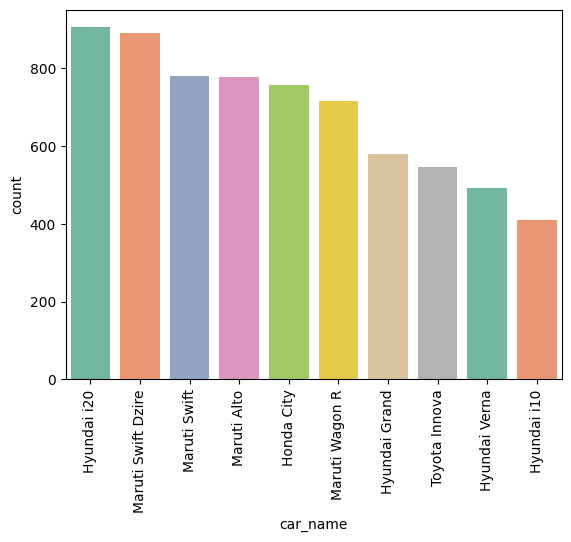

In [70]:
sns.countplot(x="car_name",palette="Set2", data = df, order=df["car_name"].value_counts().head(10).index)
plt.xticks(rotation = 90)

In [71]:
# mean of i20 to find one car price
i20 = df[df["car_name"] == 'Hyundai i20']
selling_price_i20 = i20.selling_price.mean()
print("the average mean price of i20 is", selling_price_i20)
av_share_i20 = df["car_name"].value_counts(normalize=True)*100
print("the average share of hyundai i20 is", round(av_share_i20[0],2), "%")

the average mean price of i20 is 543603.7527593819
the average share of hyundai i20 is 5.88 %


# most sold car by brand

In [72]:
df.brand.value_counts().head(10)

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

<Axes: xlabel='brand', ylabel='count'>

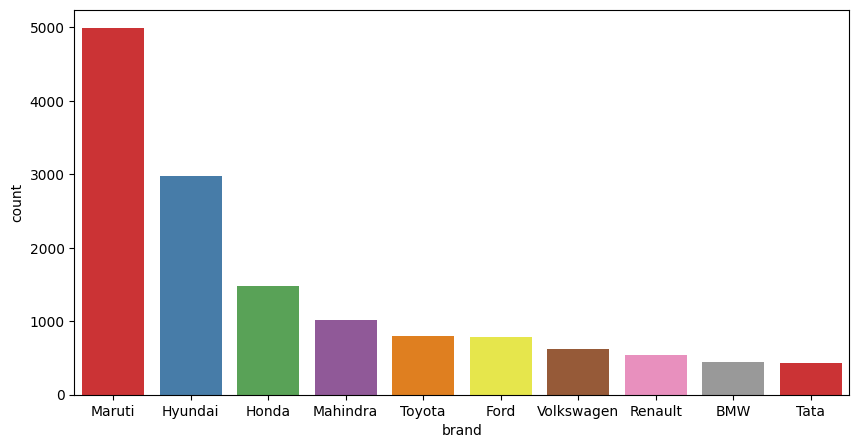

In [73]:
plt.figure(figsize=(10,5))
sns.countplot(x = "brand", data = df, palette="Set1",order=df["brand"].value_counts().head(10).index)

In [74]:
# average mean of maruti brand

maruti = df[df['brand'] == "Maruti"]
maruti["selling_price"].mean()


487089.3179086539

In [75]:
# Top most costlier brand on 
max_brand_price= df.groupby('brand').selling_price.max()
max_brand_name = df[df["selling_price"]==max_brand_price.max()]
max_brand_name['brand']

15409    Ferrari
Name: brand, dtype: object

In [76]:
# Top 10 most costlier brand on 
max_brand_price= df.groupby('brand').selling_price.max()
top_10_expensive_cars=max_brand_price.sort_values(ascending=False).head(10)
top_10_expensive_cars


brand
Ferrari          39500000
Rolls-Royce      24200000
Bentley          14500000
Mercedes-Benz    13000000
Porsche          11100000
Land Rover        9200000
BMW               8500000
Volvo             8195000
Lexus             8000000
Audi              6800000
Name: selling_price, dtype: int64

In [77]:
df[df["selling_price"]==max_brand_price.max()]['brand']

15409    Ferrari
Name: brand, dtype: object

In [78]:
max_brand_price= df.groupby('brand').selling_price.max()


In [79]:
m = max_brand_price.sort_values(ascending=False)[:10:]
m.index

Index(['Ferrari', 'Rolls-Royce', 'Bentley', 'Mercedes-Benz', 'Porsche',
       'Land Rover', 'BMW', 'Volvo', 'Lexus', 'Audi'],
      dtype='object', name='brand')

<Axes: xlabel='brand', ylabel='selling_price'>

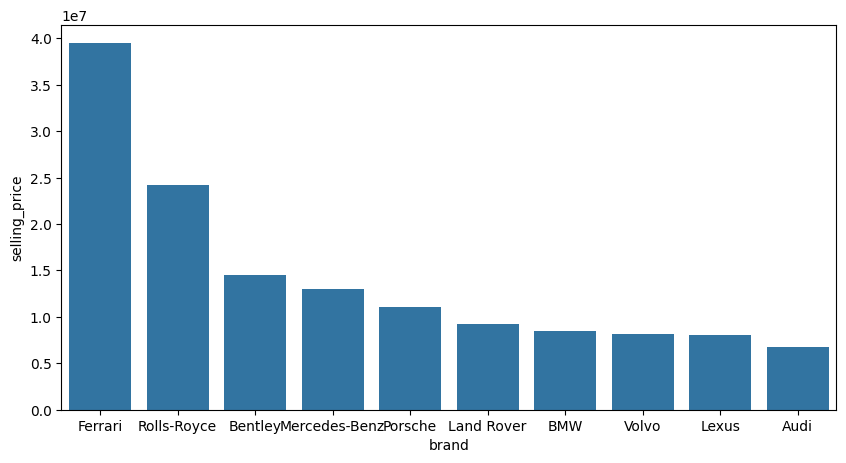

In [80]:
plt.figure(figsize=(10,5))
top_10 = top_10_expensive_cars.to_frame()
# print(top_10)
sns.barplot(x = top_10.index, y = top_10['selling_price'])


Top 10 costlier cars in dataset

In [81]:
car = df.groupby('car_name').selling_price.max()
car = car.to_frame().sort_values('selling_price',ascending=False)[:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ferrari GTC4Lusso'),
  Text(1, 0, 'Rolls-Royce Ghost'),
  Text(2, 0, 'Bentley Continental'),
  Text(3, 0, 'Mercedes-Benz S-Class'),
  Text(4, 0, 'Porsche Cayenne'),
  Text(5, 0, 'Land Rover Rover'),
  Text(6, 0, 'BMW 7'),
  Text(7, 0, 'BMW Z4'),
  Text(8, 0, 'Volvo XC'),
  Text(9, 0, 'BMW X5')])

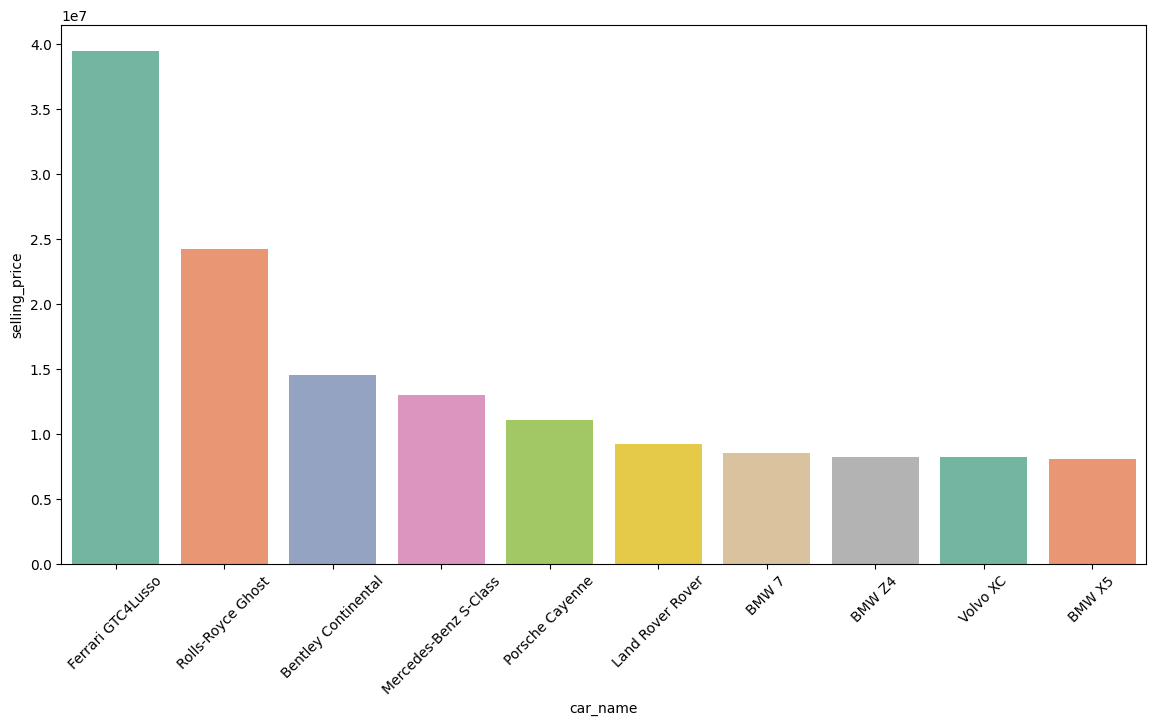

In [82]:
plt.figure(figsize=(14,7))

sns.barplot(x = car.index, y = car['selling_price'], palette="Set2")
plt.xticks(rotation=45)

Km driven vs vehicle age

<Axes: xlabel='vehicle_age', ylabel='km_driven'>

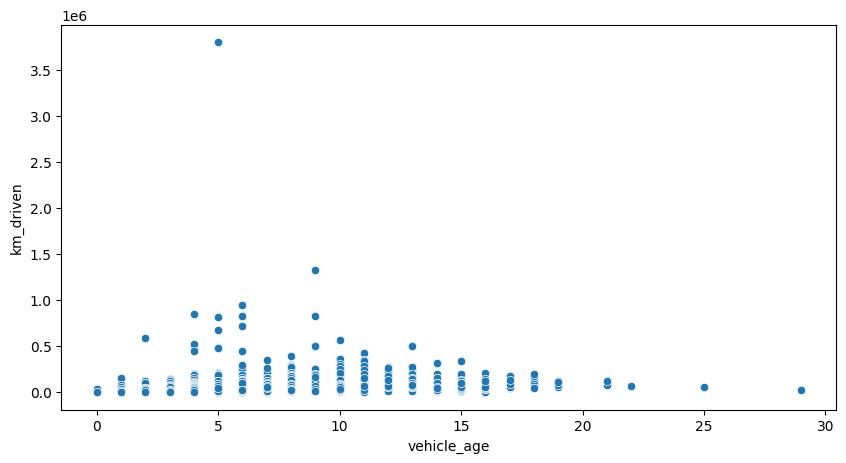

In [83]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['vehicle_age'], y=df['km_driven'])

In [84]:
max_km_driven= df.km_driven.max()
index = df[df["km_driven"]==max_km_driven.max()].index
index[0]
#df.drop(index[0], inplace=True)

13314

In [85]:
df[df["km_driven"]==max_km_driven]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
13314,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.0,2179,140.0,7,1225000


<Axes: xlabel='km_driven', ylabel='vehicle_age'>

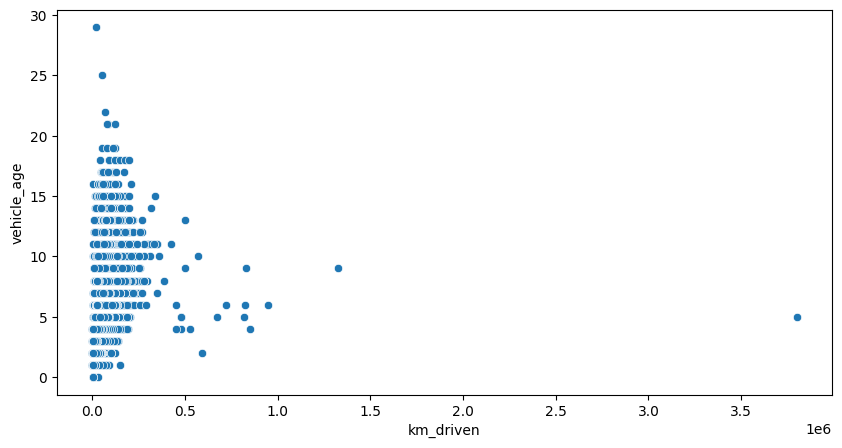

In [86]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['km_driven'],y=df['vehicle_age'])

In [87]:
# top 10 mileage based on brand on 
mileage=df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


Text(0, 0.5, 'Mileage in kmpl')

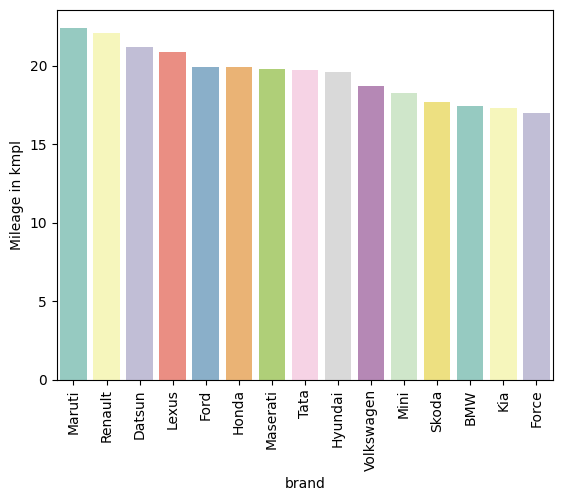

In [88]:
sns.barplot(x=mileage.index,y = mileage.values, palette='Set3')
plt.xticks(rotation= 90)
plt.ylabel('Mileage in kmpl')

In [89]:
# most milage car

mileage_car = df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
mileage_car.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Tata Tiago'),
  Text(1, 0, 'Maruti Ciaz'),
  Text(2, 0, 'Maruti Vitara'),
  Text(3, 0, 'Renault KWID'),
  Text(4, 0, 'Maruti Celerio'),
  Text(5, 0, 'Maruti Dzire VXI'),
  Text(6, 0, 'Maruti Dzire LXI'),
  Text(7, 0, 'Maruti Dzire ZXI'),
  Text(8, 0, 'Ford Aspire'),
  Text(9, 0, 'Maruti Swift')])

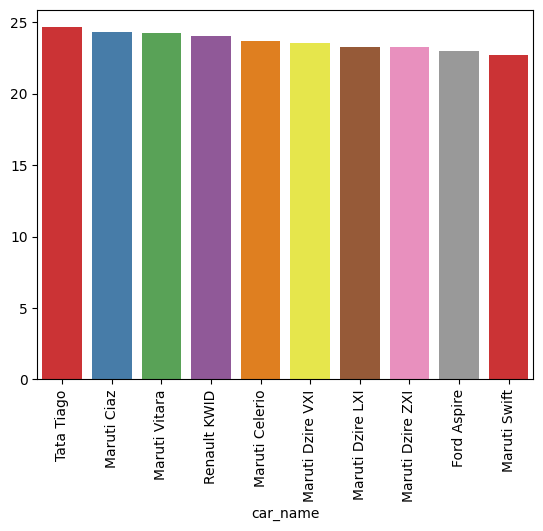

In [90]:
sns.barplot(x=mileage_car.index,y=mileage_car.values, palette='Set1')
plt.xticks(rotation= 90)

# km_driven vs selling price

(-10000.0, 10000000.0)

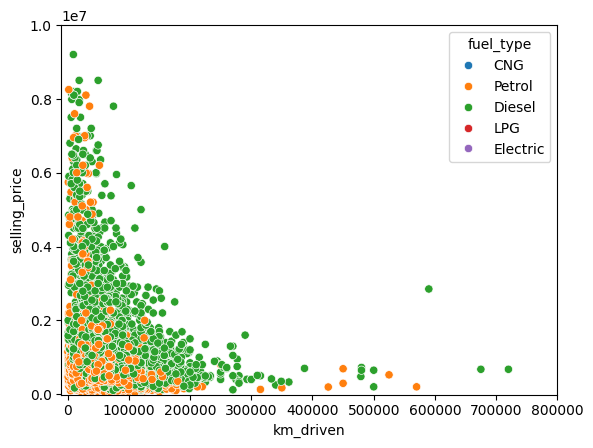

In [91]:
sns.scatterplot(x=df['km_driven'],y=df['selling_price'], data=df, hue="fuel_type")
plt.xlim(-10000,800000)
plt.ylim(-10000,10000000)

# Brand vs selling price

In [92]:
brand_price= df.groupby('brand').selling_price.mean().sort_values(ascending=False)
brand_price.to_frame()

,selling_price
brand,
Ferrari,3.950000e+07
Rolls-Royce,2.420000e+07
Bentley,9.266667e+06
Maserati,6.100000e+06
Porsche,5.161190e+06
Lexus,5.146500e+06
Mercedes-AMG,5.100000e+06
Land Rover,3.823902e+06
Volvo,3.729700e+06


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Ferrari'),
  Text(1, 0, 'Rolls-Royce'),
  Text(2, 0, 'Bentley'),
  Text(3, 0, 'Maserati'),
  Text(4, 0, 'Porsche'),
  Text(5, 0, 'Lexus'),
  Text(6, 0, 'Mercedes-AMG'),
  Text(7, 0, 'Land Rover'),
  Text(8, 0, 'Volvo'),
  Text(9, 0, 'BMW'),
  Text(10, 0, 'Jaguar'),
  Text(11, 0, 'Mercedes-Benz'),
  Text(12, 0, 'Mini'),
  Text(13, 0, 'Audi'),
  Text(14, 0, 'ISUZU'),
  Text(15, 0, 'Jeep'),
  Text(16, 0, 'MG'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Toyota'),
  Text(19, 0, 'Isuzu'),
  Text(20, 0, 'Nissan'),
  Text(21, 0, 'Mahindra'),
  Text(22, 0, 'Skoda'),
  Text(23, 0, 'Force'),
  Text(24, 0, 'Tata'),
  Text(25, 0, 'Ford'),
  Text(26, 0, 'Honda'),
  Text(27, 0, 'Hyundai'),
  Text(28, 0, 'Volkswagen'),
  Text(29, 0, 'Maruti'),
  Text(30, 0, 'Renault'),
  Text(31, 0, 'Datsun')])

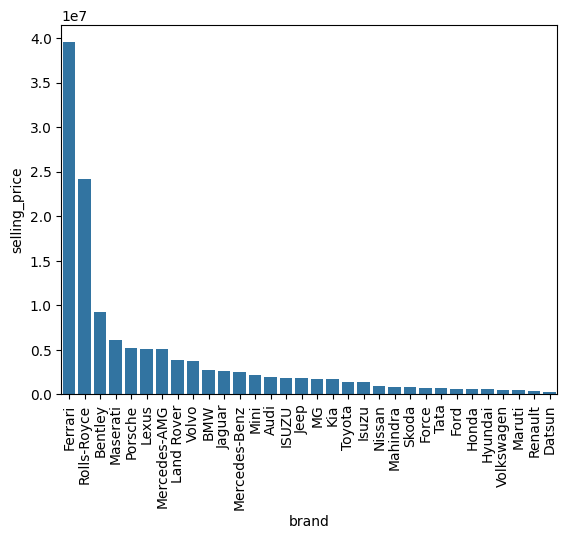

In [93]:
sns.barplot(brand_price)
plt.xticks(rotation=90)

Brand vs Km driven

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Datsun'),
  Text(2, 0, 'Renault'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Mahindra'),
  Text(5, 0, 'Skoda'),
  Text(6, 0, 'Ford'),
  Text(7, 0, 'Tata'),
  Text(8, 0, 'Volkswagen'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'Force'),
  Text(11, 0, 'Toyota'),
  Text(12, 0, 'Mini'),
  Text(13, 0, 'Nissan'),
  Text(14, 0, 'Kia'),
  Text(15, 0, 'Audi'),
  Text(16, 0, 'Isuzu'),
  Text(17, 0, 'MG'),
  Text(18, 0, 'Land Rover'),
  Text(19, 0, 'BMW'),
  Text(20, 0, 'Mercedes-Benz'),
  Text(21, 0, 'Jeep'),
  Text(22, 0, 'Volvo'),
  Text(23, 0, 'ISUZU'),
  Text(24, 0, 'Jaguar'),
  Text(25, 0, 'Lexus'),
  Text(26, 0, 'Porsche'),
  Text(27, 0, 'Maserati'),
  Text(28, 0, 'Mercedes-AMG'),
  Text(29, 0, 'Bentley'),
  Text(30, 0, 'Rolls-Royce'),
  Text(31, 0, 'Ferrari')])

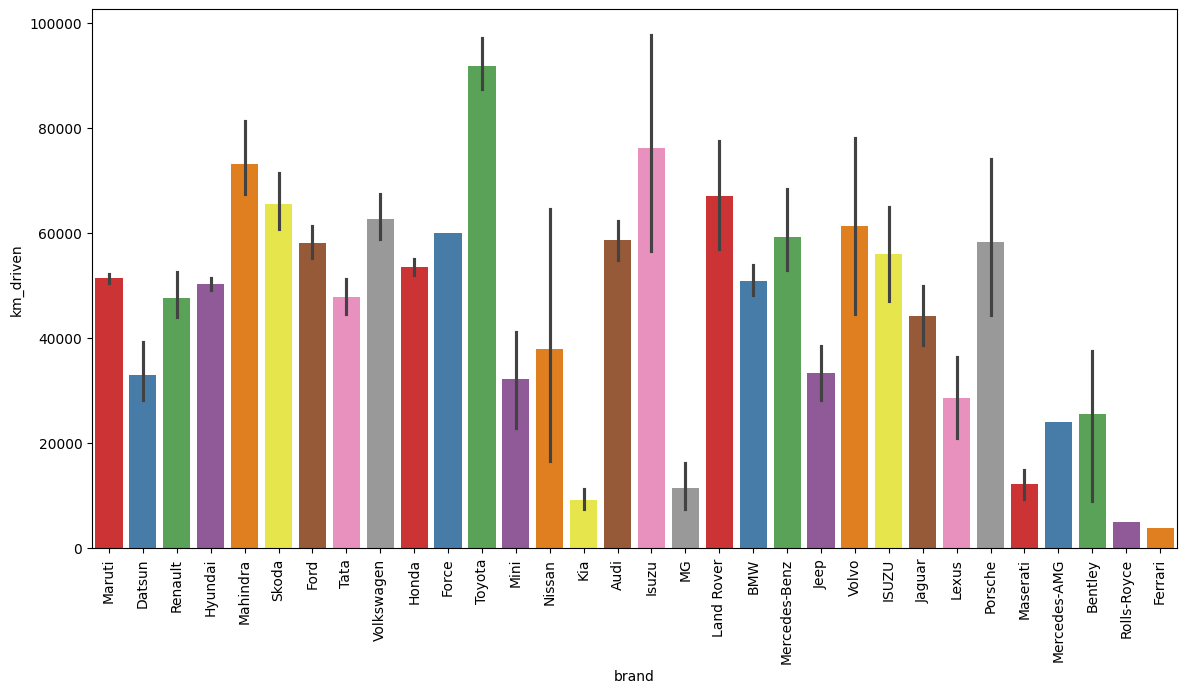

In [94]:
plt.figure(figsize=(14,7))
sns.barplot(x=df['brand'], y= df['km_driven'], palette="Set1")
plt.xticks(rotation=90)



In [95]:
# fuel type vs selling price
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


<Axes: xlabel='fuel_type'>

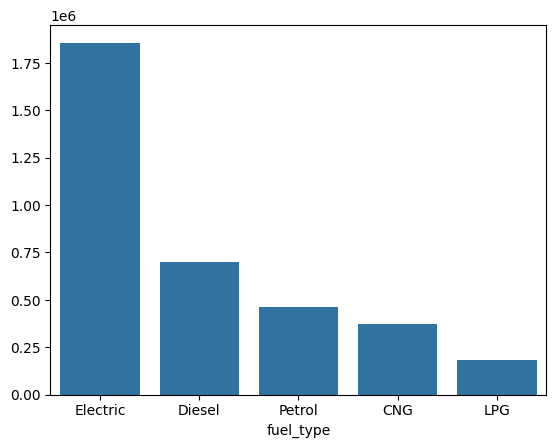

In [96]:
sns.barplot(x = fuel.index, y=fuel.values)

<Axes: xlabel='fuel_type', ylabel='count'>

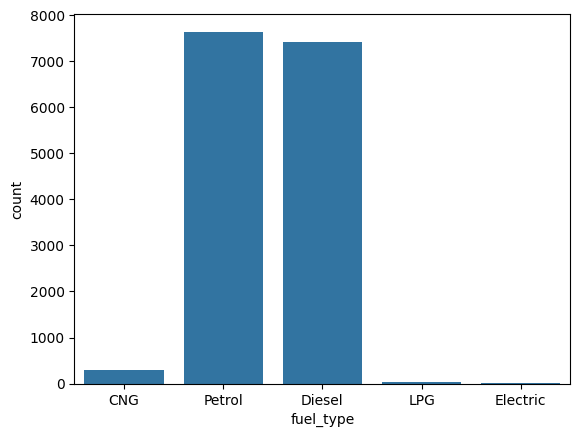

In [97]:
# most sold fuel type
sns.countplot(x=df['fuel_type'])

In [98]:
# Fuel type vs Mileage
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)

fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


<Axes: xlabel='fuel_type', ylabel='mileage'>

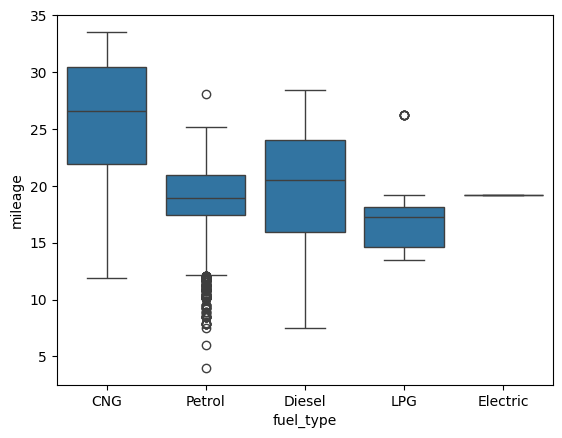

In [99]:
sns.boxplot(x= 'fuel_type', y='mileage', data = df)

(0.0, 10000000.0)

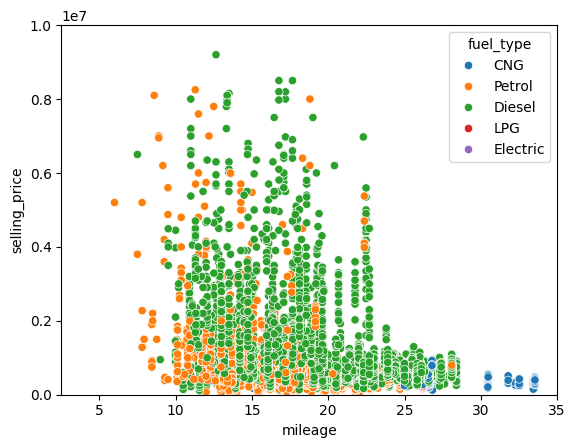

In [100]:
# mileage vs selling price
sns.scatterplot(x= 'mileage', y= 'selling_price', data=df,hue='fuel_type')
plt.ylim(0,10000000)

# Mileage distribution

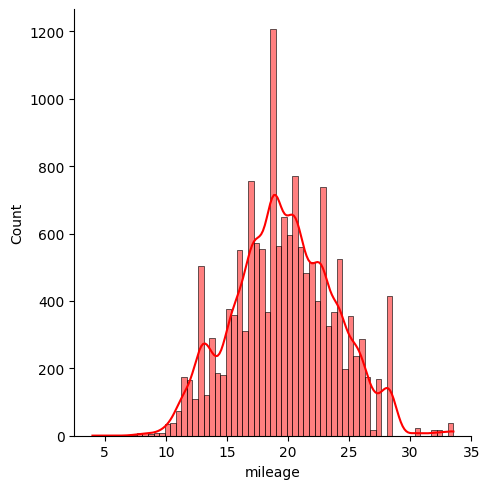

In [101]:
sns.displot(x= 'mileage',data=df, kde= True, color="red")

# vehicle age vs selling price

<Axes: xlabel='vehicle_age', ylabel='selling_price'>

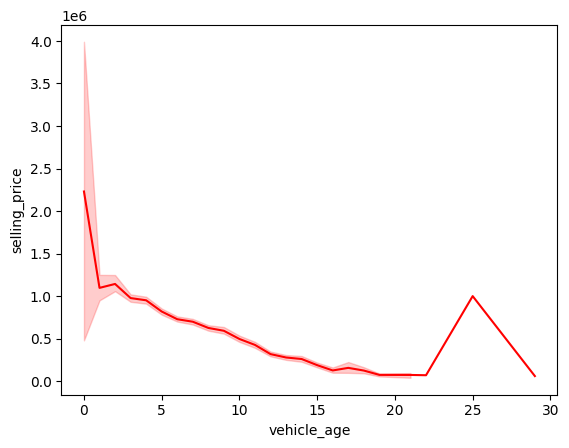

In [102]:
sns.lineplot(x= 'vehicle_age', y= 'selling_price', data=df, color= 'red')


# vehicle age vs mileage


In [103]:
vehicle_age =  df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head()

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


<Axes: xlabel='vehicle_age', ylabel='mileage'>

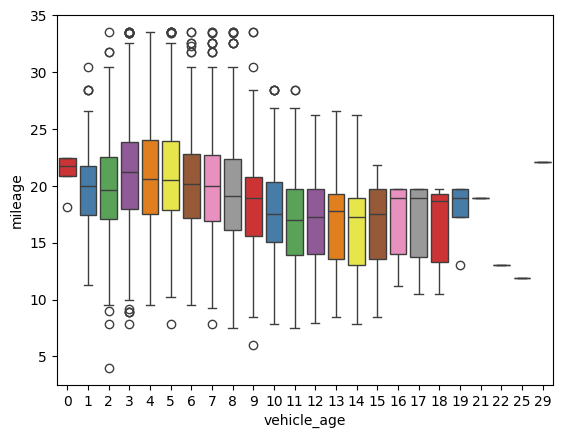

In [104]:
plt.subplots(figure=(14,7))
sns.boxplot(x=df['vehicle_age'], y=df['mileage'], palette='Set1')

# transmission type vs selling price

<Axes: xlabel='transmission_type', ylabel='selling_price'>

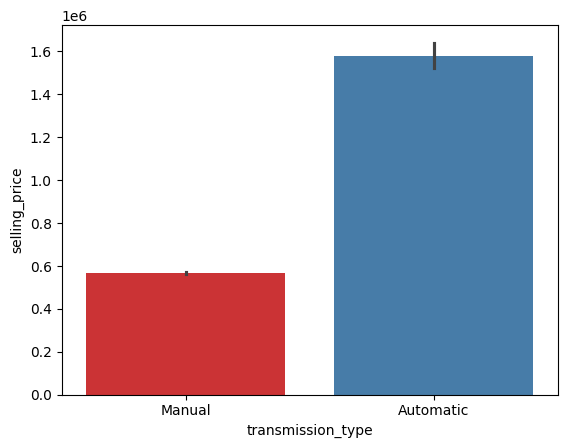

In [105]:
plt.subplots(figure=(14,7))
sns.barplot(x=df['transmission_type'], y=df['selling_price'], data=df, palette="Set1")


# transmission type vs mileage

<Axes: xlabel='transmission_type', ylabel='mileage'>

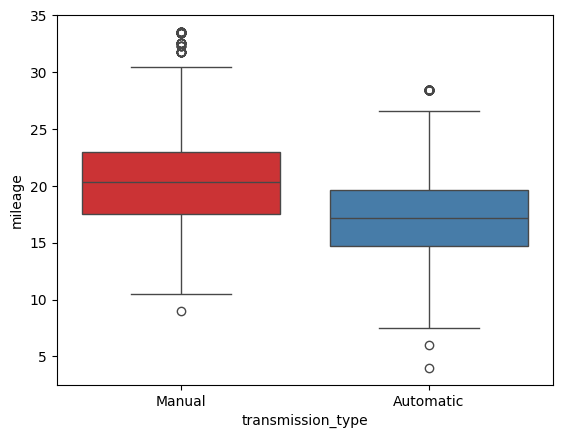

In [106]:
plt.subplots(figure=(14,7))
sns.boxplot(x=df['transmission_type'], y=df['mileage'], data=df, palette="Set1")


# transmission type vs count

<Axes: xlabel='transmission_type', ylabel='count'>

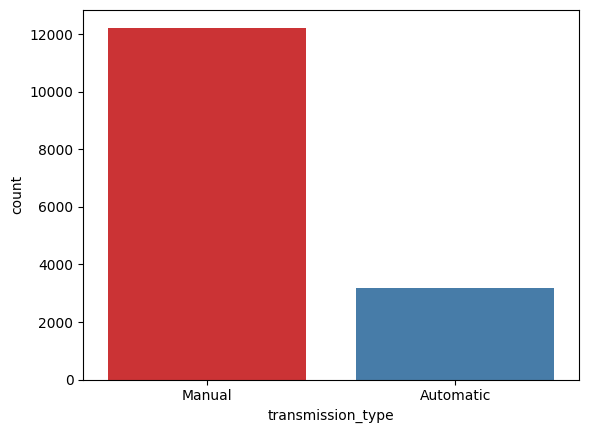

In [107]:
plt.subplots(figure=(14,7))
sns.countplot(x='transmission_type', data=df, palette="Set1")


# seller type vs count

<Axes: xlabel='seller_type', ylabel='count'>

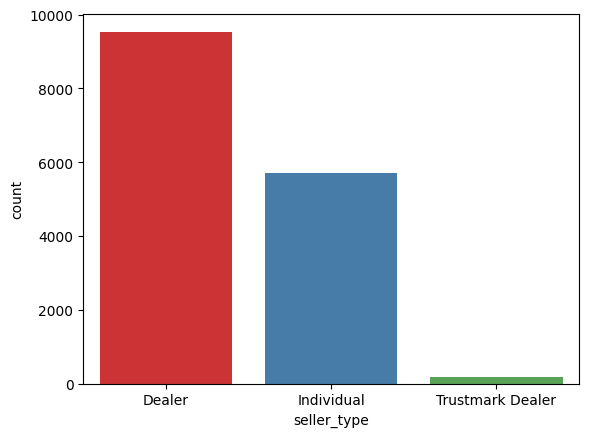

In [108]:
plt.subplots(figure=(14,7))
sns.countplot(x='seller_type', data=df, palette="Set1")


# seller type vs selling price

In [109]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


Text(0, 0.5, 'Median Selling Price')

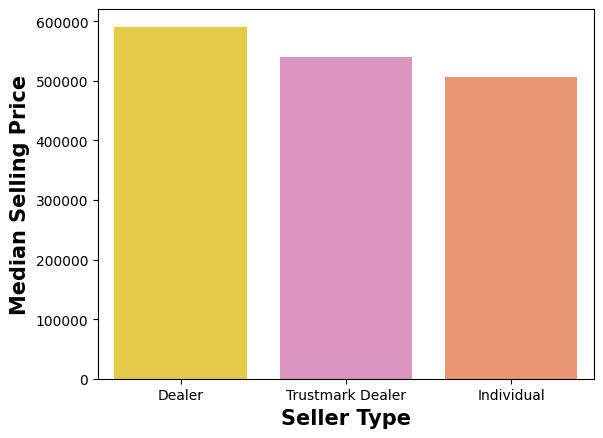

In [110]:
plt.subplots(figure=(14,7))
sns.barplot(x=dealer.index, y =dealer.values,palette="Set2_r")
plt.xlabel("Seller Type", weight="bold", fontsize= 15)
plt.ylabel("Median Selling Price", weight="bold", fontsize= 15)

# Final report


- The datatypes and columns names were right and there was 15411 rows and 13 columns.
- The selling price column is the target to predict i.e. Regression Problem
- There are outliers in the km_driven, engine, selling_price and max power
- Dealers are the highest sellers of the used cars.
- Skewness were found in few columns will be checked after handling the oultiers.
- vehicle age have negative effect on price.
- Manual cars are mostly sold and automatic cars has higher selling average than manual cars.
- Petrol is the most preffered vehicle of the fuel in used cars dataset, followed by diesel and LPG.

# Feature engineering

In [111]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000


# Removing unnecessary columns

In [112]:
df_model = pd.read_csv("cleaned_cars.csv")
df_model

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11918,Toyota Innova,Toyota,Innova,11,105000,Dealer,Petrol,Manual,12.40,1998,132.0,8,675000
11919,Toyota Innova,Toyota,Innova,10,103000,Dealer,CNG,Manual,12.40,1998,132.0,8,1080000
11920,Toyota Innova,Toyota,Innova,11,92626,Dealer,Petrol,Manual,12.40,1998,132.0,8,440000
11921,Toyota Innova,Toyota,Innova,10,100000,Individual,CNG,Manual,12.40,1998,132.0,8,380000


In [113]:
df_model =  df.copy() # raw data
df_model

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [114]:
df_model.drop(labels=['car_name', 'brand', 'model'], axis=1, inplace=True)

In [115]:
df_model

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [116]:
df_model.dtypes

vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

# converting categorical data to numerical

using One Hot Encoding(get_dummies) to convert categorical data to numerical

In [117]:
df_model = pd.get_dummies(df_model, dtype='float')
df_model

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,53800,26.83,796,38.4,5,235000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,11,11000,26.83,796,38.4,5,185000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11,80000,26.83,796,38.4,5,150000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,57000,26.83,796,38.4,5,172000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11,72000,26.83,796,38.4,5,125000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,8.60,5998,552.0,4,8100000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15407,4,5000,10.20,6592,563.0,4,24200000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15408,9,37500,6.00,5998,600.0,5,5200000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15409,2,3800,4.00,3855,601.0,4,39500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [118]:
df_model.dtypes

vehicle_age                       int64
km_driven                         int64
mileage                         float64
engine                            int64
max_power                       float64
seats                             int64
selling_price                     int64
seller_type_Dealer              float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
fuel_type_CNG                   float64
fuel_type_Diesel                float64
fuel_type_Electric              float64
fuel_type_LPG                   float64
fuel_type_Petrol                float64
transmission_type_Automatic     float64
transmission_type_Manual        float64
dtype: object

# creating Feature Matrix(independent Variable) & Target variable (dependent Variable)

In [119]:
X = df_model.drop('selling_price', axis= 1) # independent variable
X

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,53800,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,11,11000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11,80000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,57000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11,72000,26.83,796,38.4,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,8.60,5998,552.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15407,4,5000,10.20,6592,563.0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15408,9,37500,6.00,5998,600.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15409,2,3800,4.00,3855,601.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [120]:
y = df_model['selling_price'] # target variable or dependent variable
y

0          235000
1          185000
2          150000
3          172000
4          125000
           ...   
15406     8100000
15407    24200000
15408     5200000
15409    39500000
15410    14500000
Name: selling_price, Length: 15411, dtype: int64

# checking important features

In [121]:
pip install scikit-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [122]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [123]:
print("checking for feature importance")
print("-"*50)
print(model.feature_importances_)

checking for feature importance
--------------------------------------------------
[1.70663577e-01 5.15370868e-02 6.13727580e-02 1.45149869e-01
 3.59987706e-01 1.47773900e-02 3.92706489e-03 3.94043315e-03
 2.25153031e-05 4.08452853e-05 7.19369179e-03 2.15894697e-05
 1.87701489e-06 2.05911371e-02 7.77625219e-02 8.30099376e-02]


# visualisation for feature importance

<Axes: >

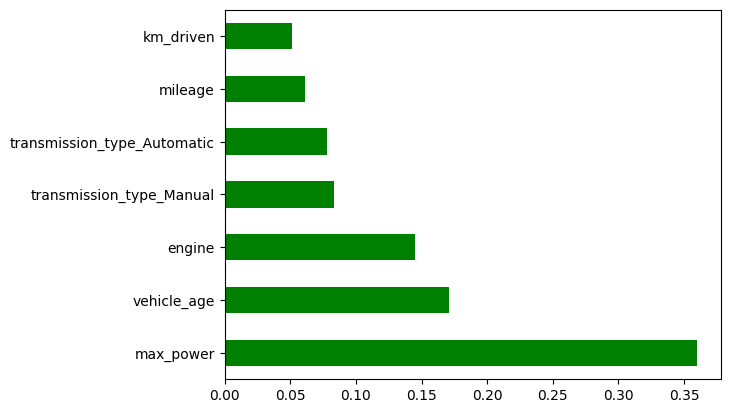

In [124]:
imp_features = pd.Series(model.feature_importances_, index = X.columns)
imp_features.nlargest(7).plot(kind='barh', color='g')

# Model Building and Evaluation

Train - test split

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# importing important libraries for Model Building

In [126]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [127]:
models = [LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor,Ridge, Lasso]

mse=[]
rmse = []
evs =[]
r_square_score = []


for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    print(pred)
    mse.append(mean_squared_error(y_true=y_test, y_pred=pred))
    rmse.append(np.sqrt(mean_squared_error(y_true=y_test, y_pred=pred)))
    evs.append(explained_variance_score(y_true=y_test, y_pred=pred))
    r_square_score.append(r2_score(y_true=y_test, y_pred=pred))
               

[239767.63567645 107712.98628215 445650.71339058 ... 789896.17256423
 567077.62755198 432708.63245087]
[554488.85747554 555157.84903603 554783.50366106 ... 554396.25191123
 554783.23834777 554440.80695289]
[520000. 270000. 525000. ... 825000. 425000. 465000.]
[525380.         278864.16666667 476767.5        ... 826393.33333333
 450525.         426070.        ]
[239649.85531889 107701.67531191 445692.09129967 ... 789902.59539899
 567088.57109902 432801.38754107]
[239764.9025163  107712.0923231  445651.39902042 ... 789897.51599223
 567077.34175245 432709.38245694]


# creating DataFrame for model camparison

In [128]:
ML_model_df = pd.DataFrame({"Model":['Linear Regression', 'Support vector Regression', 'Decision Tree Regressor',\
                                      'Random Forest Regressor', 'Ridge', 'Lasso'],
                                      'Mean Squarred Error':mse,
                                      'Root mean squared error': rmse,
                                      "Explained variance Error": evs,
                                      "R-Squared Score(Accuracy)": r_square_score})

ML_model_df.set_index("Model", inplace=True)
ML_model_df

,Mean Squarred Error,Root mean squared error,Explained variance Error,R-Squared Score(Accuracy)
Model,,,,
Linear Regression,3.259151e+11,570889.704978,0.637765,0.637716
Support vector Regression,9.541954e+11,976829.253639,0.000079,-0.060674
Decision Tree Regressor,1.676219e+11,409416.528323,0.813808,0.813673
Random Forest Regressor,1.279495e+11,357700.322148,0.857861,0.857773
Ridge,3.259251e+11,570898.515006,0.637754,0.637705
Lasso,3.259147e+11,570889.360744,0.637766,0.637717


# Generating Pickle file - Saving Trained Model

In [129]:
import pickle

saved_models=[]

for model_class in models:
    model = model_class()
    regressor = model.fit(X_train, y_train)

    # Save the trained model to a pickle file
    model_filename = f"{model_class.__name__}_model.pkl"

    with open(model_filename, "wb") as model_file:
        pickle.dump(regressor, model_file)

    saved_models.append(model_filename)

val = [5,3800000,16.00,2179,140.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0]

val=[11,43000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0]
#val= [6,10000,20.85,1197,83.14,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0]

In [130]:
# for model in saved_models:
#     regressor = model().fit(X_train, y_train)
#     pred = model.predict([val])
#     print(pred)

In [131]:
# import pickle

# with open('RandomForestRegressor_model.pkl', 'rb') as f:
#     data = pickle.load(f)

In [132]:
# data

In [133]:
# data.predict([val])

In [134]:
# X_test

In [135]:
# y_test

In [136]:
# val =[2,37095,24.30,1248,88.50,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0]
# data.predict([val])

In [137]:
# val = [8,50000,25.80,1498,98.60,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0]
# data.predict([val])

## Splitting the Input feature and Output Feature

* Input Feature:  *name,year, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power,seats*

* Output Feature: *selling_price*


In [138]:
df_model

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,53800,26.83,796,38.4,5,235000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,11,11000,26.83,796,38.4,5,185000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11,80000,26.83,796,38.4,5,150000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,57000,26.83,796,38.4,5,172000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11,72000,26.83,796,38.4,5,125000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,8.60,5998,552.0,4,8100000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15407,4,5000,10.20,6592,563.0,4,24200000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15408,9,37500,6.00,5998,600.0,5,5200000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15409,2,3800,4.00,3855,601.0,4,39500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [139]:
input_data = df_model.drop(columns=['selling_price'])
output_data = df_model['selling_price']

- now we are splitting the dataset into training dataset and testing dataset

- 20% data goes into testing dataset and 80% data goes into training 

In [140]:
x_train, x_test, y_train, y_test = train_test_split(input_data,output_data,test_size=0.2)

# Model Creation

In [141]:
model = RandomForestRegressor()

# Train Model

In [142]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [143]:
predict = model.predict(x_test)
predict

array([335373.33333333, 964850.        , 298220.        , ...,
       660344.16666667, 568000.        , 616910.        ])

In [144]:
x_train.shape

(12328, 16)

In [145]:
x_train.head(1)

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
12905,7,90000,22.32,1582,126.32,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## predecting values from model

In [146]:
import pickle

# Load the saved model
with open('RandomForestRegressor_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


In [147]:
# Prepare input data for prediction
input_data_model = pd.DataFrame(
    [[3, 12000, 22.0, 1197 ,81.8, 5, 0.0, 1.0, 0.0 ,0.0 ,0.0, 0.0, 0.0 ,1.0, 1.0, 0.0]],
    columns=['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 
             'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 
             'fuel_type_CNG', 'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_LPG', 
             'fuel_type_Petrol', 'transmission_type_Automatic', 'transmission_type_Manual'])


In [148]:

# Make predictions
predictions = loaded_model.predict(input_data_model)

print("Predicted Selling Price:", predictions)

Predicted Selling Price: [750950.]
